In [1]:
import pandas as pd  # Data handling
import matplotlib.pyplot as plt # visualization
from scipy.integrate import odeint # numerical integration
import numpy as np
from pyvbmc import VBMC # VMBC object
import scipy.stats as scs # scipy stats to get distributions from
from pyvbmc.priors import UniformBox, Trapezoidal, SplineTrapezoidal, SmoothBox # nice priors from PyVBMC

In [2]:
def diffyqs(X, t, omega0_2):
    xdot,x = X
    dx = xdot
    dv = -omega0_2*x
    return [dv, dx]


def analytic_sol(t,omega0,initial_condition):
    v0,x0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

def analytic_sol_fancy(t,omega0,initial_condition):
    v0, x0 = initial_condition
    return x0/np.cos(np.arctan(v0/(omega0 * x0))) * np.cos(omega0 * t - np.arctan(v0/(omega0 * x0)))

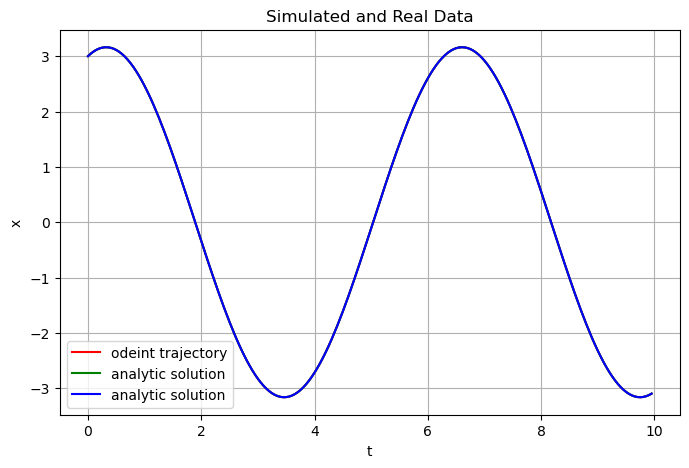

In [3]:
initial_condition = [1, 3]

k = 1
m = 1
omega0 = np.sqrt(k/m)
omega0_2 = k/m
t = np.arange(0,10,0.05)

sol_numerical = odeint(diffyqs, initial_condition, t, args=(omega0_2,)) # pass odeint the differential equation, initial condition, time array, and parameters
sol_analytic = analytic_sol(t,omega0,initial_condition)
sol_analytic_fancy = analytic_sol_fancy(t,omega0,initial_condition)

# plot plot plot
plt.figure(figsize=(8,5))
plt.plot(t,sol_numerical[:,1], label = 'odeint trajectory',c = 'r') # to get the right part of the solution you have to do this weird transpose index thing
plt.plot(t,sol_analytic, label = "analytic solution", c = 'g')
plt.plot(t,sol_analytic_fancy, label = "analytic solution", c = 'b')
plt.title('Simulated and Real Data')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()
plt.show()